In [44]:
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']

# 推測統計

推測統計には大きく「推定」と「検定」がある

## 標本分布

母集団からランダムに標本を取得する際の標本の背後にある分布のこと<br>
ただし、標本分布は実際には存在しない。

## 推定量

母数の推定に使う標本統計量を推定量という<br>

## 不偏性

推定量が”平均的に”母数と一致する場合その推定量は「不偏性がある」という<br>
推定量として適しているかどうかを判断する基準は不偏性があるか？<br>


In [46]:
m = 100
n = 50
column = 'tip'
sample_means = []

for _ in range(m):
    sampled_df = df.sample(n)
    sample_mean = sampled_df[column].mean()
    sample_means.append(sample_mean)

print('標本平均', np.mean(sample_means))
print('母平均', df[column].mean())
print('標本分散', np.var(sample_means))
print('母分散', np.var(df[column])/n)

標本平均 3.0046679999999997
母平均 2.9982786885245902
標本分散 0.03605367057599998
母分散 0.03813217024993285


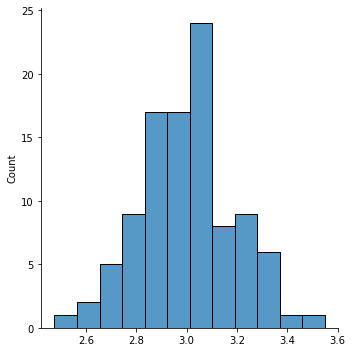

In [47]:
sns.displot(sample_means)

## 不偏分散

In [48]:
# 不偏分散
stats.tvar(df['tip'])

1.914454638062471

In [49]:
np.var(df['tip'], ddof=1)

1.9144546380624725

In [50]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [51]:
stats.tstd(df['tip'])

1.3836381890011822

In [52]:
np.std(df['tip'], ddof=1)

1.3836381890011826

## 不偏分散の不編性

In [53]:
# 母集団の分散
np.var(df['tip'])

1.9066085124966428

In [54]:
m = 1000
n = 50
column = 'tip'
sample_vars = []
sample_uvars = []

for _ in range(m):
    sample_df = df.sample(n)
    sample_var = np.var(sample_df[column])
    sample_vars.append(sample_var)

    sample_uvar = np.var(sample_df[column], ddof=1)
    sample_uvars.append(sample_uvar)

print('標本分散', np.mean(sample_vars))
print('不偏分散', np.mean(sample_uvars))

標本分散 1.8882884427600002
不偏分散 1.9268249415918368


## 推定

### 点推定と区間推定

#### 区間推定とは？
- 母数の値を区間を持って推定すること
- 区間と共に確度をつける(信頼区間)

例）95%の信頼区間とは100回に5回は間違える

### 比率の区間推定の手順
1. 母集団から標本を無作為抽出する(母比率はpとする)
2. 標本から推定量(標本比率)を計算する($\frac{x}{n}$)<br>
※点推定の場合ここで終わり
3. 二項分布を用いて標本平均をnp、分散をnpqと考えることができる（nが大きい時平均np,分散npqの正規分布に近似できる）
4. 比率の標本分布は平均($\frac{np}{n}=p$)、標準偏差($\sqrt{npq}=\sqrt{\frac{pq}{n}}$)の正規分布となる(分散は$\frac{pq}{n}$)
5. 比率の標本分布を標準化する($z=\frac{\frac{x}{n}-p}{\sqrt{\frac{pq}{n}}}$)
6. zが-1.96~1.96の区間で95%の確率になるため、$-1.96 < \frac{\frac{x}{n}-p}{\sqrt{\frac{pq}{n}}} < 1.96$に対してpについて解く

=> 母比率pはp1~p2の間であることが95%確かであると言える

In [55]:
stats.binom.interval(0.99, 1000, 0.6)

(560.0, 640.0)

In [56]:
n = 50
m = 100
col = 'sex'
target = 'Male'
count = 0
alpha = 0.95
results = []

population_rat = len(df[df[col]==target])/len(df)

for _ in range(m):
    sample_df = df.sample(n)
    sample_rat = len(sample_df[sample_df[col]==target])/len(sample_df)
    min_num, max_num = stats.binom.interval(alpha=alpha, n=n, p=sample_rat)
    min_rat = min_num / n
    max_rat = max_num / n
    
    correct = min_rat < population_rat < max_rat
    results.append({'min': min_rat, 'max': max_rat, 'correct': correct})
    
results_df = pd.DataFrame(results)
print(results_df['correct'].value_counts())
print(results_df['correct'].value_counts()[True]/m)

True     96
False     4
Name: correct, dtype: int64
0.96


In [57]:
results_df['correct'].value_counts()[True]

96

### 平均値の区間推定

In [58]:
col = 'tip'
n = 50
m = 100
alpha = 0.95
results = []

popilation_mean = df[col].mean()

for _ in range(m):
    sample_df = df.sample(n)
    
    # 標本平均
    sample_mean = sample_df[col].mean()

    # 不偏分散
    sample_var = stats.tvar(sample_df[col])
    
    # alpha=信頼度、loc=標本平均、scale=標本平均の標準偏差
    min_val, max_val = stats.norm.interval(alpha=alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))

    correct = min_val < popilation_mean < max_val
    results.append({'min': min_val, 'max': max_val, 'correct': correct})

result_df = pd.DataFrame(results)
print(len(result_df[result_df['correct'] == True]) / len(result_df))
result_df['correct'].value_counts()

0.97


True     97
False     3
Name: correct, dtype: int64

### t分布
自由度(degree of freedom)n − 1をパラメータにとる<br>
t dist(df=1) => n=2<br>
t dist(df=5) => n=6<br>
t dist(df=9) => n=10<br>

nが30くらいあればほぼほぼ正規分布として扱って良い

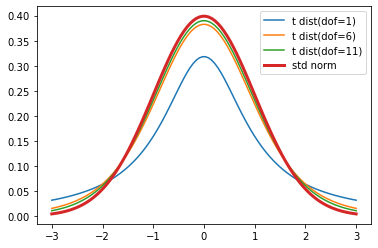

In [59]:
x = np.linspace(-3, 3, 100)

z = stats.norm.pdf(x)

for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f't dist(dof={dof})')

plt.plot(x, z, label='std norm', linewidth=3)
plt.legend()

### 平均の区間推定(正規分布 vs t分布)

In [63]:
n = 50
m = 100
col = 'tip'
alpha = 0.95
norm_results = []
t_results = []

population_mean = df[col].mean()


for _ in range(m):
    sample_df = df.sample(n)
    sample_mean = sample_df[col].mean()
    sample_var = stats.tvar(sample_df[col])
    
    # 正規分布
    min_norm_val, max_norm_val = stats.norm.interval(alpha=alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
#     print(min_norm_val, max_norm_val)
#     norm_correct = min_norm_val < population_mean < max_norm_val
#     norm_results.append({'min': min_norm_val, 'max': max_norm_val, 'correct': norm_correct})
    
    # t分布
    min_t_val, max_t_val = stats.t.interval(alpha=alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=n-1)
#     print(min_t_val, max_t_val)
#     t_correct = min_t_val < population_mean < max_t_val
#     t_results.append({'min': min_t_val, 'max': max_t_val, 'correct': t_correct})


print('正規分布:', min_norm_val, max_norm_val)
print('t分布:', min_t_val, max_t_val)
# result_norm_df = pd.DataFrame(norm_results)
# result_t_df = pd.DataFrame(t_results)
# print(result_norm_df['correct'].value_counts())
# print(result_t_df['correct'].value_counts())




正規分布: 2.428760267711639 3.0976397322883598
t分布: 2.4202948197328182 3.1061051802671806
